In [6]:
from ising import ising_model as im
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
unit_test_dE=im()
print(unit_test_dE.matrix)
#Calculat the change in energy for flipping a value. Should be 8
print(unit_test_dE.deltaE(1,1))

[[ 1.  1.]
 [ 1.  1.]]
8.0


In [35]:
unit_test_init=im()
unit_test_init.matrix[1,1]=-1
unit_test_init.temp=2
#Tests the initializer. For temp >1.5 we keep the old values of the matrix, else we set them to 1
unit_test_init.initialize()
print(unit_test_init.matrix)

unit_test_init.temp=1
unit_test_init.initialize()
print(unit_test_init.matrix)

[[ 1.  1.]
 [ 1. -1.]]
[[ 1.  1.]
 [ 1.  1.]]


In [39]:
unit_test_metropolis=im()
unit_test_metropolis.temp=20
print(unit_test_metropolis.matrix)
#This is a bit harder to test because there is no exact final value, but we should see some changes from a set up of all 1s at
#high temperatures
unit_test_metropolis.metropolis()
print(unit_test_metropolis.matrix)

[[ 1.  1.]
 [ 1.  1.]]
[[ 1. -1.]
 [-1.  1.]]


In [16]:
'''Assorted programs for graphing the expectaiton values as a function of the cycles.'''

def new_initialize(model,rand):
    for i in range(len(model.matrix)):
        for k in range(len(model.matrix[i])):
        
            if rand:
                model.matrix[i,k]=random.choice([-1,1])
            else:
                model.matrix[i,k]=1
            
            model.M+=model.matrix[i,k]

    for x in range(len(model.matrix)):
        for y in range(len(model.matrix[x])):

            model.E-=model.initE(x,y)
        
def main_cycles(model,rand=False):

    model.temp=model.init_temp

    model.E=0
    model.M=0

    new_initialize(model,rand)
    average=np.zeros(5)

    for cycles in range(0,model.mcs):

        model.metropolis()

        average[0]+=model.E; average[1]+=model.E**2
        average[2]+=model.M; average[3]+=model.M**2; average[4]+= np.fabs(model.M)
        
        if cycles%1000==0:
            model.output(average,cycles)

    plot_mcycles(model)
    
def plot_mcycles(model):

    plot_matrix=np.asarray(model.results)

    plot_matrix=plot_matrix.transpose()

    plot_matrix=np.around(plot_matrix,8)

    plt.plot(plot_matrix[0],plot_matrix[1])
    plt.title("Max Cycles vs Energy")
    plt.xlabel("Max Cycles")
    plt.ylabel("Energy(J)")
    plt.show()

    plt.plot(plot_matrix[0],plot_matrix[2])
    plt.title("Max Cycles vs Specific Heat")
    plt.xlabel("Max Cycles")
    plt.ylabel("Specific Heat")
    plt.show()

    plt.plot(plot_matrix[0],plot_matrix[3])
    plt.title("Max Cycles vs Magnetic Susceptibility")
    plt.xlabel("Max Cycles")
    plt.ylabel("Susceptibility")
    plt.show()

    plt.plot(plot_matrix[0],plot_matrix[4])
    plt.title("Max Cycles vs Magnetic Moment")
    plt.xlabel("Max Cycles")
    plt.ylabel("Magnetic Moment")
    plt.show()

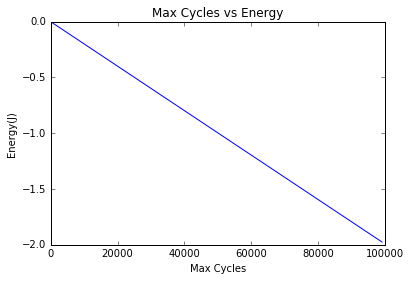

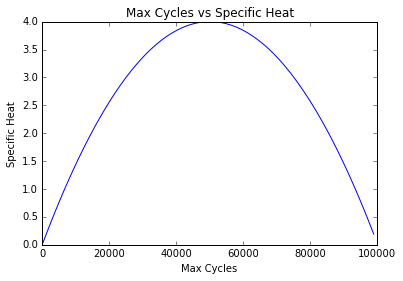

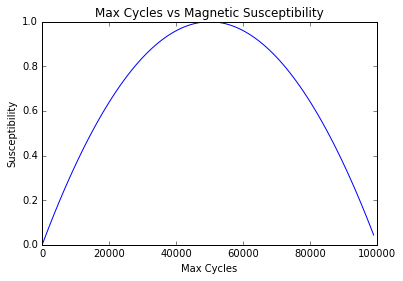

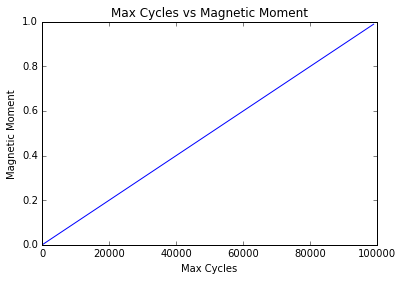

In [17]:
ising_2x2=im(size=2,max_cycles=100000,init_temp=1.0)
main_cycles(ising_2x2)

In [29]:
ising22=np.asarray(ising_2x2.results)
np.savetxt("ising_2x2.txt",ising22)

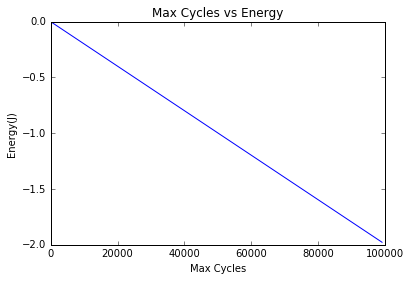

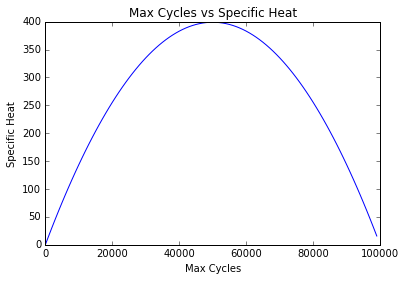

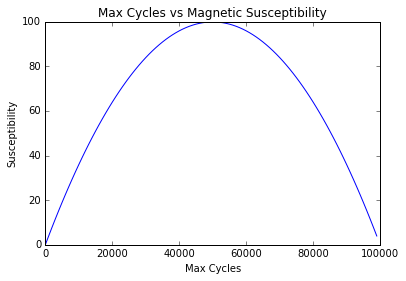

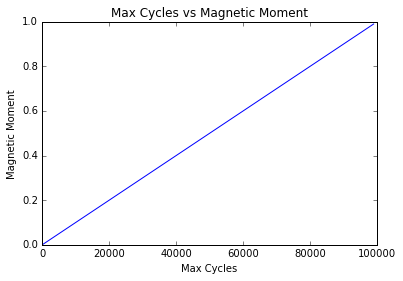

In [18]:
ising_20x20_cycle_1=im(size=20,max_cycles=100000,init_temp=1.0)
main_cycles(ising_20x20_cycle_1)

In [28]:
ising2020_cycle1=np.asarray(ising_20x20_cycle_1.results)
np.savetxt("ising_20x20_cycle1.txt",ising2020_cycle1)

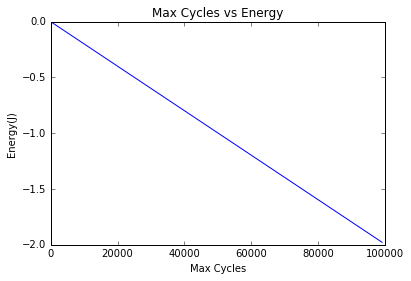

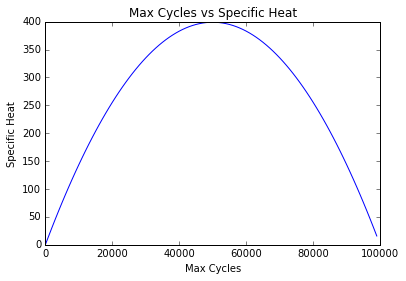

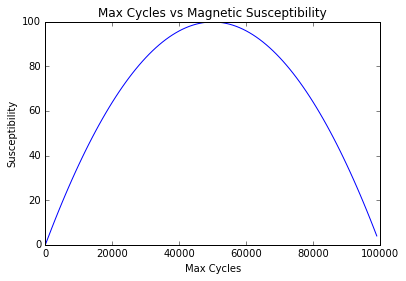

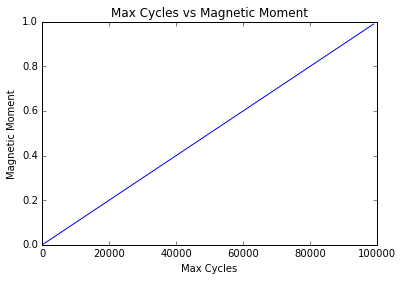

In [19]:
ising_20x20_cycle_2=im(size=20,max_cycles=100000,init_temp=1.0)
main_cycles(ising_20x20_cycle_2,rand=True)

In [27]:
ising2020_cycle2=np.asarray(ising_20x20_cycle_2.results)
np.savetxt("ising_20x20_cycle2.txt",ising2020_cycle2)

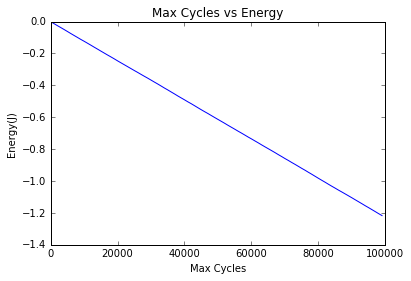

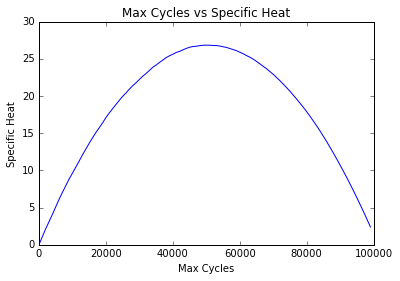

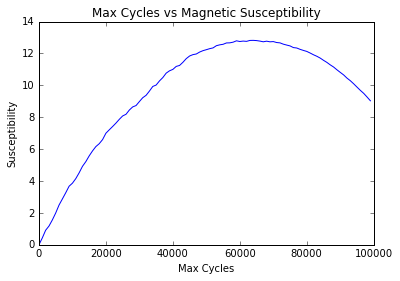

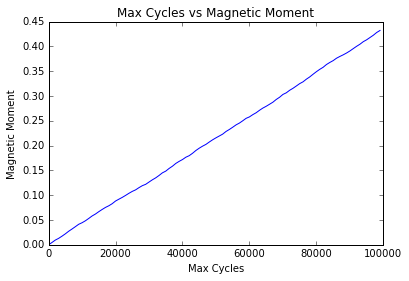

In [20]:
ising_20x20_cycle_3=im(size=20,max_cycles=100000,init_temp=2.4)
main_cycles(ising_20x20_cycle_3)

In [26]:
ising2020_cycle3=np.asarray(ising_20x20_cycle_3.results)
np.savetxt("ising_20x20_cycle3.txt",ising2020_cycle3)

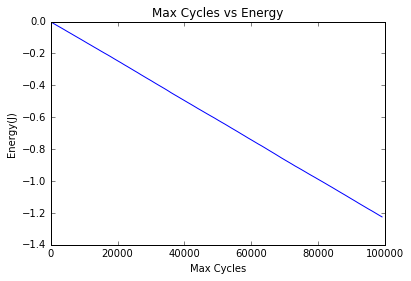

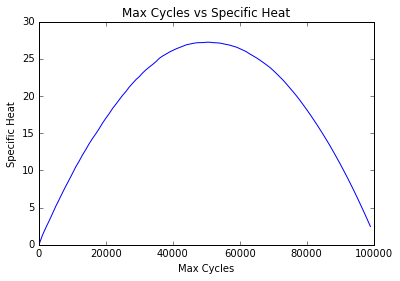

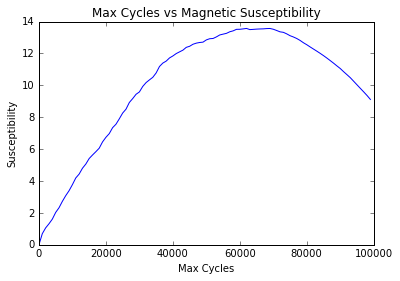

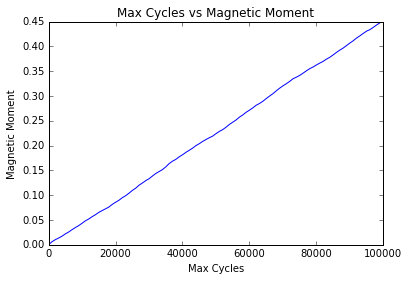

In [21]:
ising_20x20_cycle_4=im(size=20,max_cycles=100000,init_temp=2.4)
main_cycles(ising_20x20_cycle_4,rand=True)

In [25]:
ising2020_cycle4=np.asarray(ising_20x20_cycle_4.results)
np.savetxt("ising_20x20_cycle4.txt",ising2020_cycle4)

20 x 20  matrix


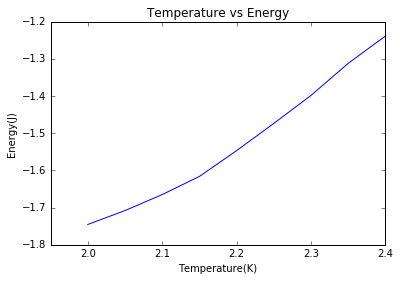

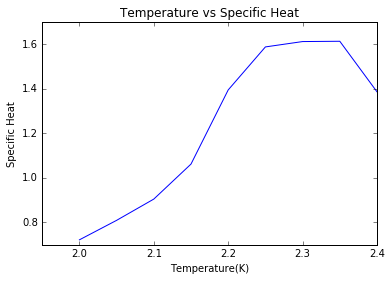

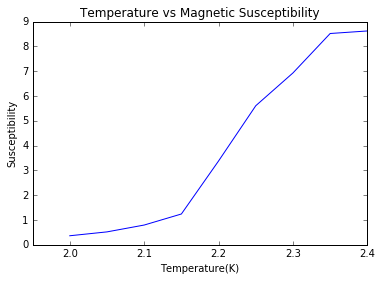

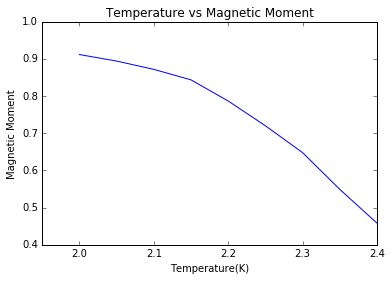

40 x 40  matrix


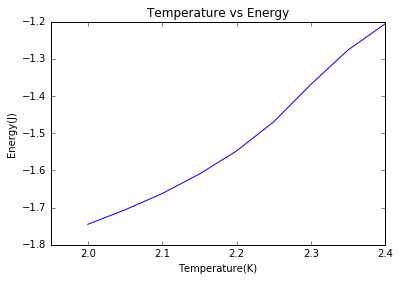

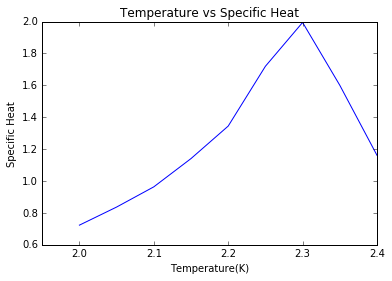

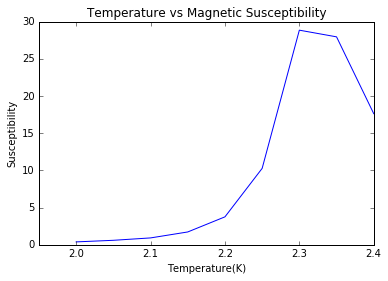

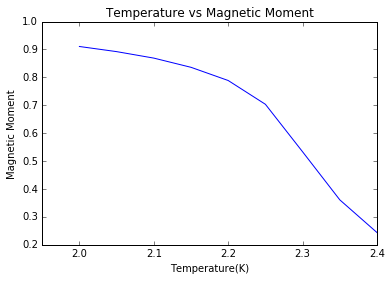

60 x 60  matrix


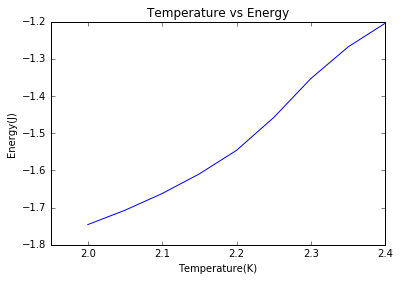

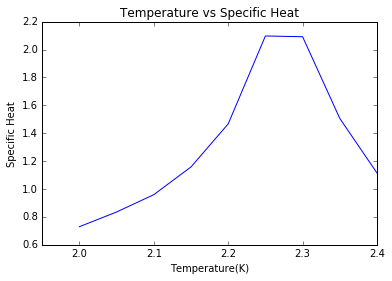

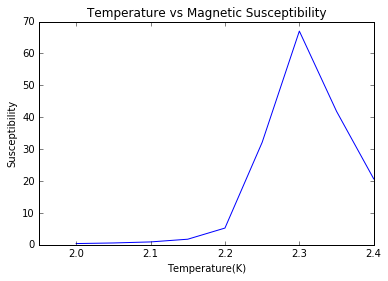

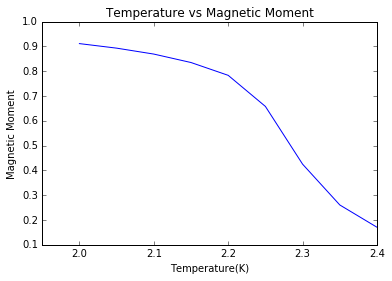

80 x 80  matrix


KeyboardInterrupt: 

In [22]:
#Ising size sweep
#Using step size of 100000

fin_results=[]

for i in [20,40,60,80]:
    
    ising_size_test=im(size=i,max_cycles=100000,init_temp=2.0,final_temp=2.4,temp_step=0.05)
    print(i,"x",i," matrix")
    ising_size_test.main()
    fin_results.append(np.asarray(ising_size_test.results))

In [23]:
ising2020=np.asarray(fin_results[0])
np.savetxt("ising_20x20.txt",ising2020)

In [24]:
ising4040=np.asarray(fin_results[1])
np.savetxt("ising_40x40.txt",ising4040)

ising6060=np.asarray(fin_results[2])
np.savetxt("ising_60x60.txt",ising6060)